We want to minimize the following expectation
$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$
We need to compute the gradient w.r.t. $\phi$. We apply the likelihood ratio trick:

\begin{eqnarray}
\nabla_\phi \mathbb{E}_{q_\phi (x)}[f(x)] & = & \nabla_\phi \sum_x q_\phi (x) f(x) \\
& = & \sum_x \nabla_\phi q_\phi (x) f(x) \\
& = & \sum_x q_\phi (x) \frac{\nabla_\phi q_\phi (x)}{q_\phi (x)} f(x)\\
& = & \mathbb{E}_{q_\phi (x)} \nabla_\phi \log q_\phi(x) f(x) \\
& = & \frac{1}{K} \sum_{i = 1}^K \nabla_\phi \log q_\phi (x^{(i)}) f(x^{(i)})
\end{eqnarray}
where $x^{(i)} \sim q_\phi (x)$.

This Likelihood Ratio Gradient has high variance, especially in higher dimensional spaces.
An example in 2D:

Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{\mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}


Apply the formula

\begin{eqnarray}
\nabla_\mu \mathcal{L} & = & \mathbb{E}\left[\nabla_\mu \log \left(\exp\left(-\frac{1}{2} (x - \mu)^\top I (x-\mu) \right)\right) f(x)\right] \\
& = & \mathbb{E} \left[\left\lvert\left\lvert x - \left[
\begin{matrix} 5 \\ 5 \end{matrix}
\right] \right\rvert\right\rvert_2^2 \nabla_\mu -\frac{1}{2} (x - \mu)^\top (x-\mu)  \right] \\
& = & \mathbb{E} \left[  \left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 (x - \mu) \right]
\end{eqnarray}


In [1]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])
n=40

x = np.random.multivariate_normal(mean=mu, cov=I, size=(n,))

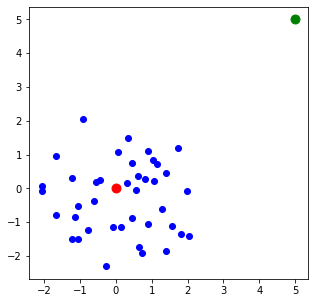

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c='b')

ax.scatter(mu[0], mu[1], c='r', s=80)
ax.scatter(target[0], target[1], c='g', s=80)

In [3]:
def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def lrg(z, mu, target):
    norm = np.linalg.norm(z - target, axis=1) ** 2
    # print('norm', norm)
    # print('z - mu', z - mu)
    grad = (norm[:, np.newaxis] * (z - mu)).mean(axis=0)

    # print('grad', grad)

    return grad

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):

        z = np.random.multivariate_normal(mean=mu, cov=I, size=n_train)
        pmu = mu
        lrgi = lrg(z, mu, target)
        mu = mu - lr * lrgi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(pmu[0], pmu[1], c='r', s=80, alpha=0.5)
            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.arrow(pmu[0], pmu[1], mu[0] - pmu[0], mu[1] - pmu[1], head_width=0.1, length_includes_head=True)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

When `n_train = 1`, the training is very unstable.
It diverges when `lr = 0.1` and converges slowly when `lr = 0.01`.

It is interesting to analyze the learning dynamic of the algorithm:

When `lr` is large, if we sample a bad datapoint (a datapoint closer to `target` than `mu`),
then `mu` is pushed further away from `target` by a large amount.
The error grows exponentially.

When `lr` is small, if a bad datapoint is sampled, `mu` moved by a only a small amount.
That (small) wrong update is corrected by other datapoints sampled later in the process.
Using smaller learning rate is similar to `wait' for more examples to be avaialble before
making a step.

Unstable------------
0 108.62263629392882
1 364.8325809638157
2 893.5526852860503
3 32052.25967217424
4 3395690.716237579
5 164052089929.28275
6 6.383090838008452e+20
7 1.4690885467894934e+40
8 1.4690885467894934e+40
9 1.4690885467894934e+40
10 1.4690885467894934e+40
11 1.4690885467894934e+40
12 1.4690885467894934e+40
13 1.4690885467894934e+40
14 1.4690885467894934e+40
15 1.4690885467894934e+40
16 1.4690885467894934e+40
17 1.4690885467894934e+40
18 1.4690885467894934e+40
19 1.4690885467894934e+40
20 1.4690885467894934e+40
21 1.4690885467894934e+40
22 1.4690885467894934e+40
23 1.4690885467894934e+40
24 1.4690885467894934e+40
25 1.4690885467894934e+40
26 1.4690885467894934e+40
27 1.4690885467894934e+40
28 1.4690885467894934e+40
29 1.4690885467894934e+40
30 1.4690885467894934e+40
31 1.4690885467894934e+40
32 1.4690885467894934e+40
33 1.4690885467894934e+40
34 1.4690885467894934e+40
35 1.4690885467894934e+40
36 1.4690885467894934e+40
37 1.4690885467894934e+40
38 1.4690885467894934e+40
39 1

<ipython-input-3-03df4d4c30f5>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


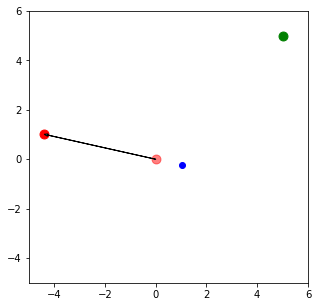

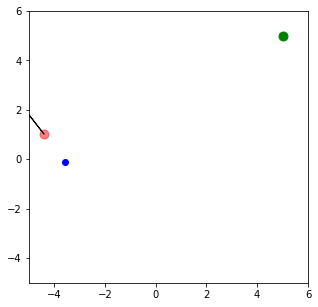

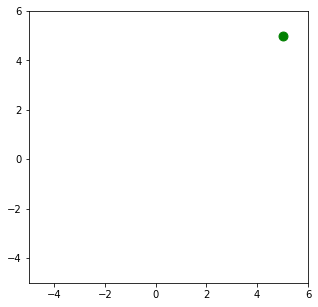

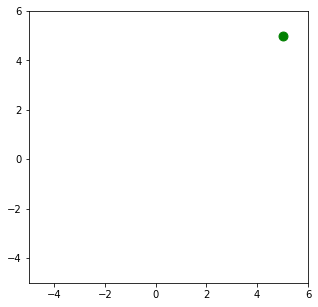

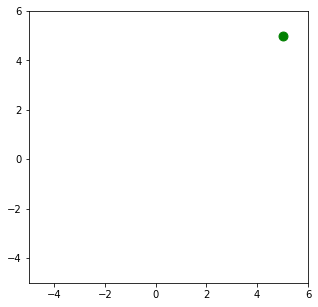

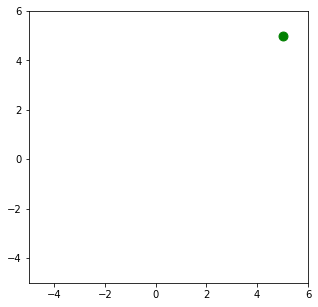

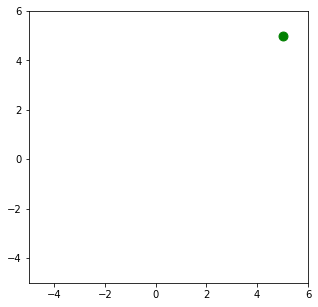

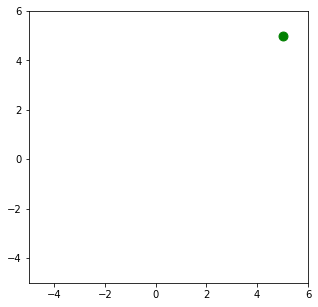

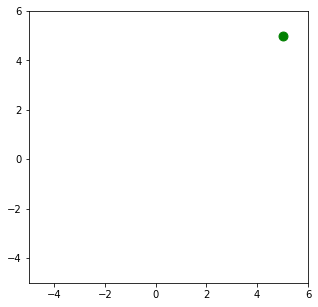

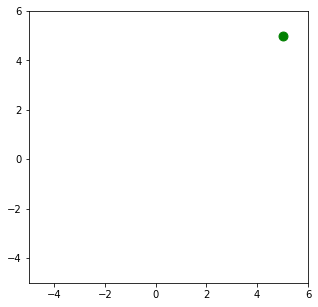

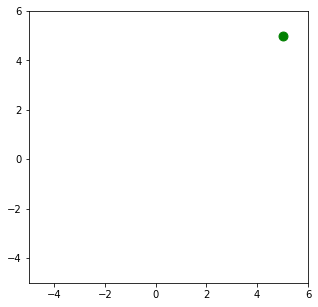

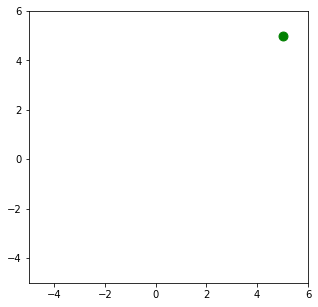

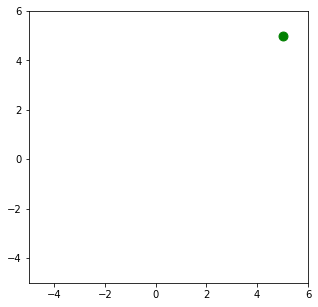

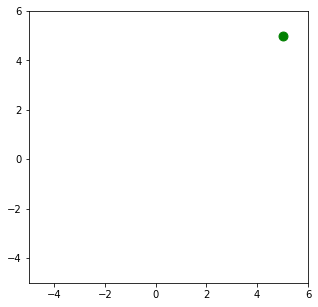

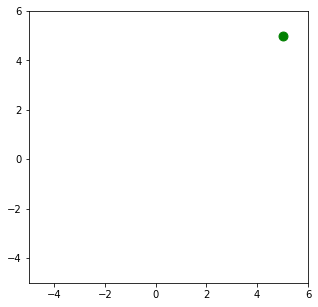

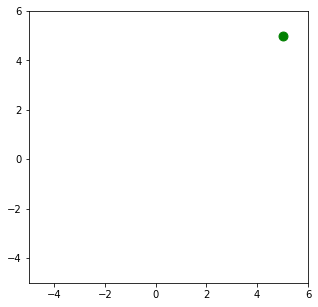

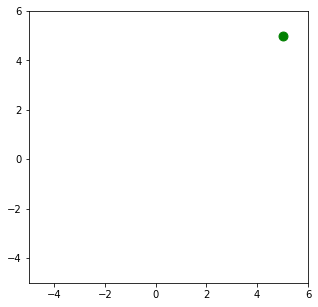

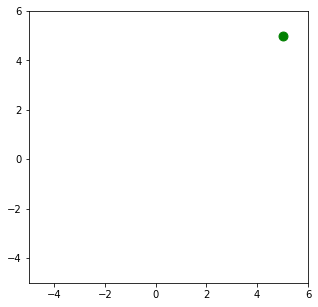

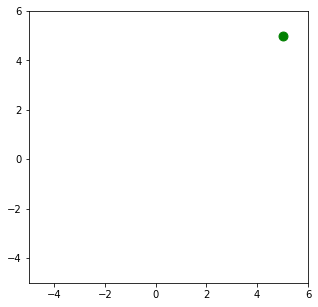

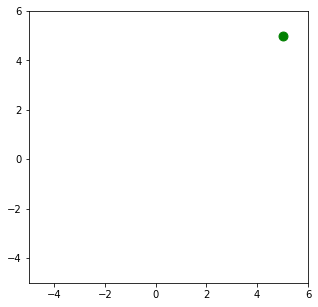

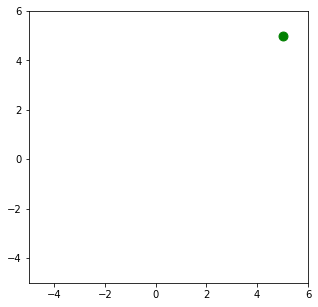

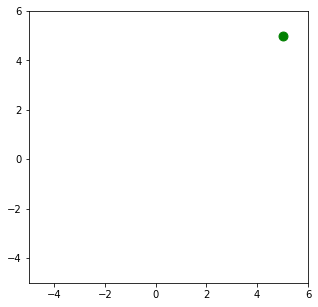

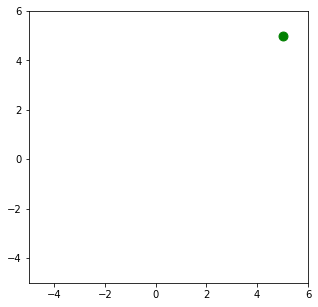

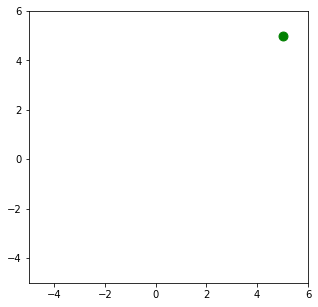

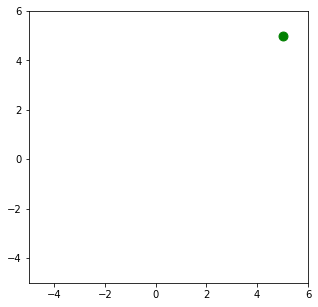

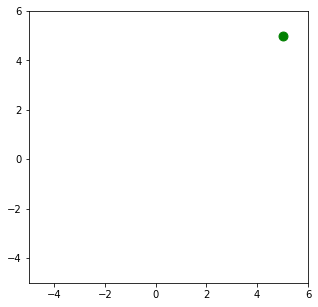

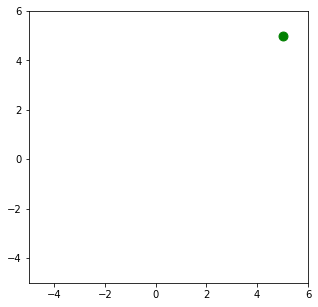

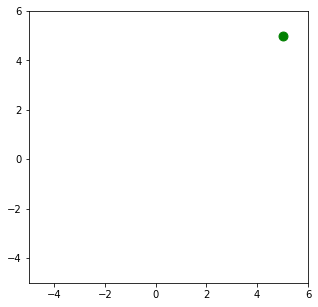

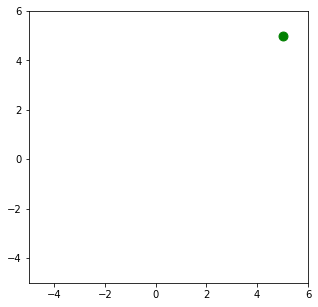

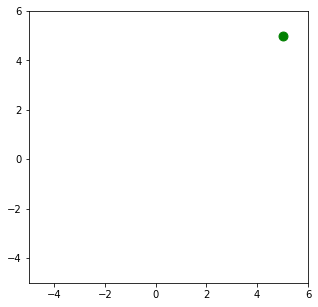

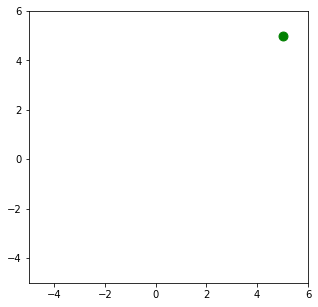

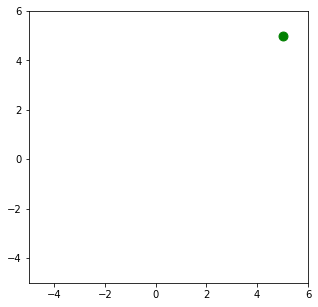

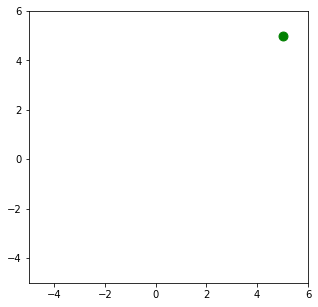

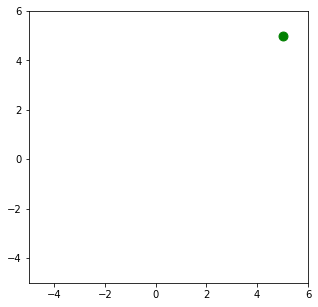

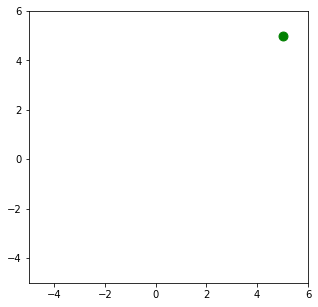

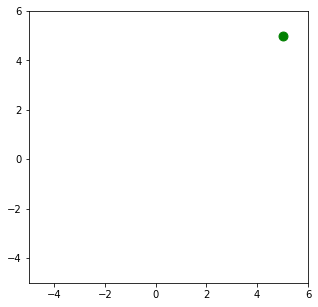

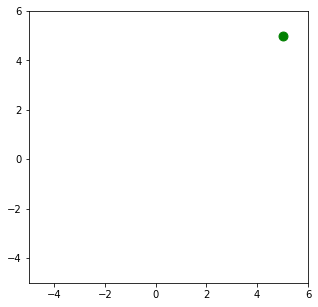

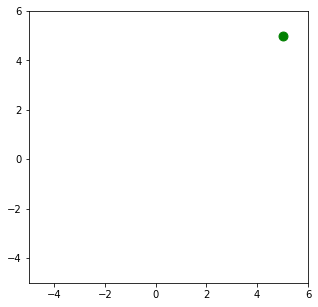

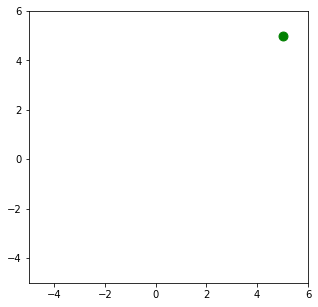

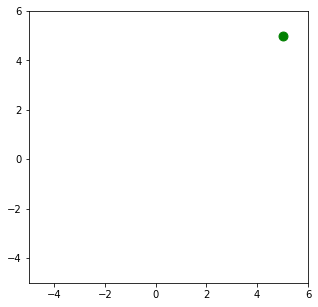

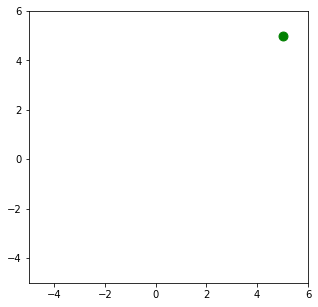

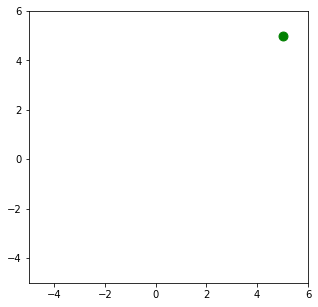

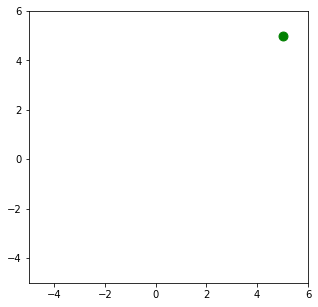

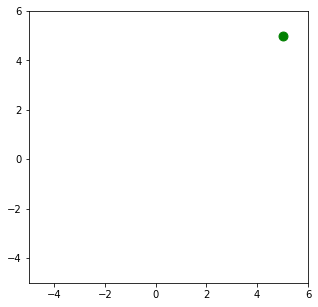

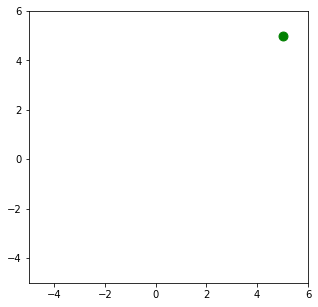

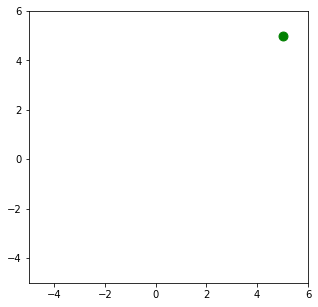

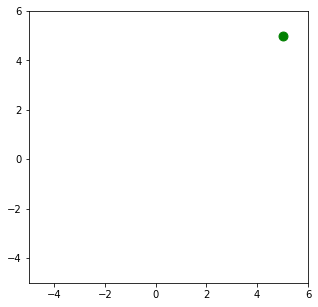

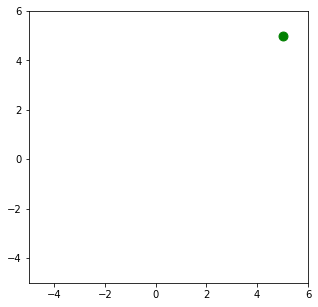

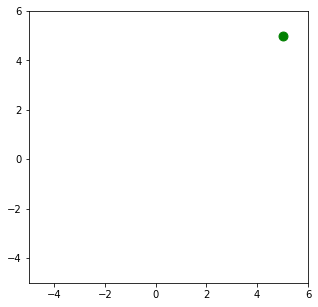

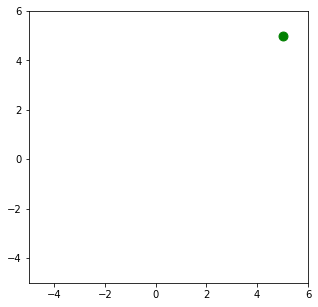

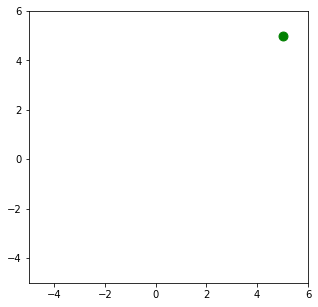

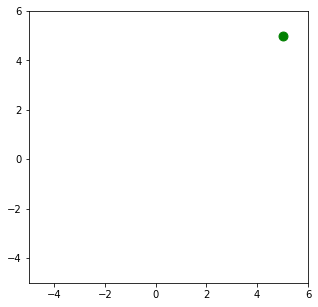

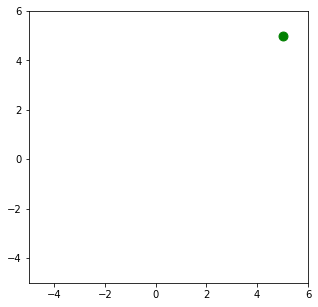

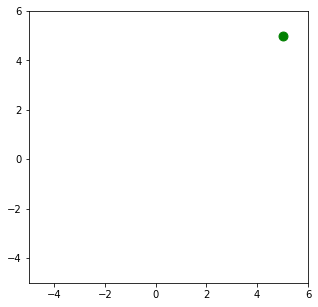

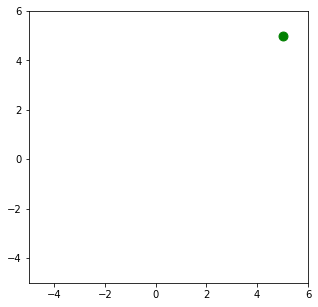

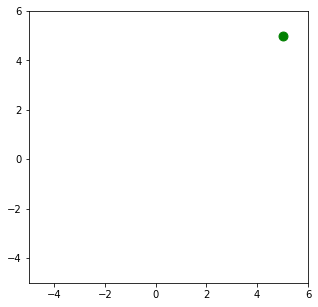

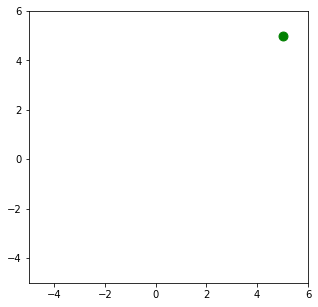

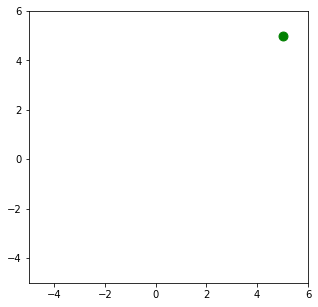

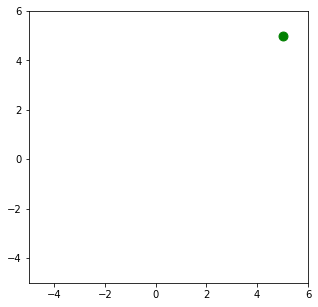

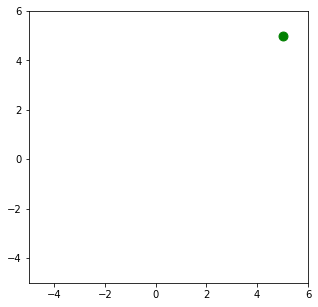

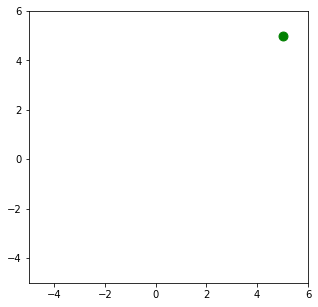

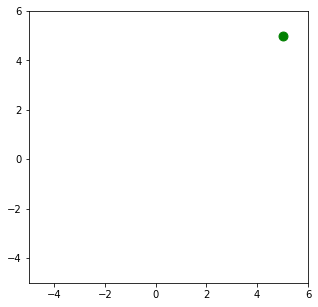

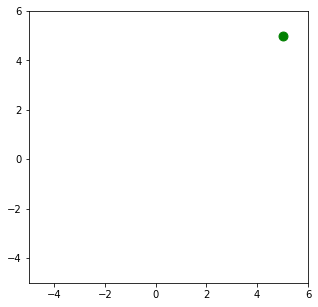

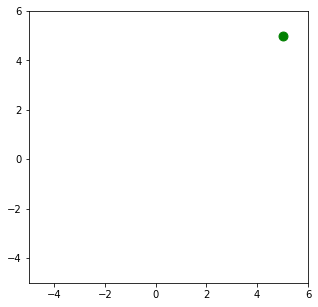

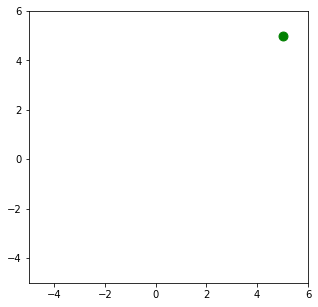

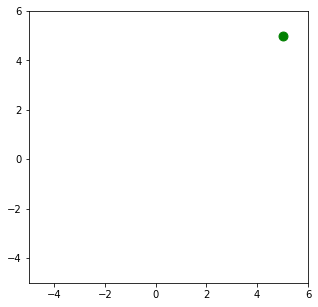

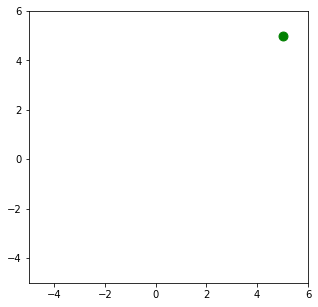

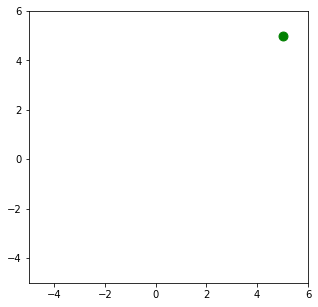

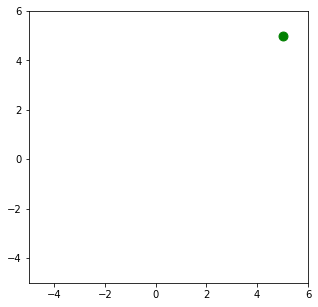

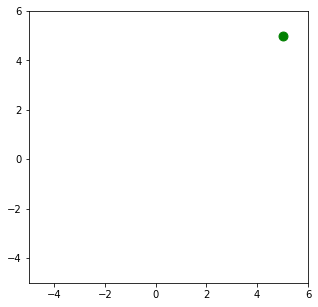

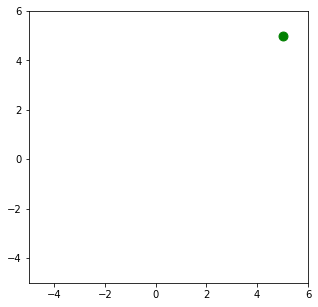

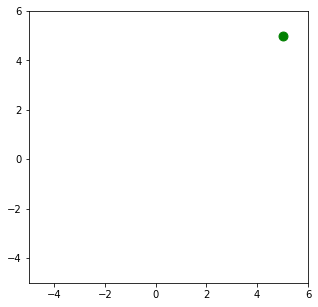

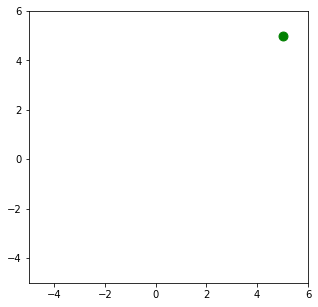

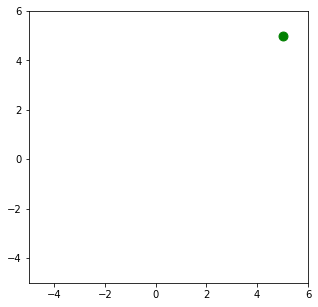

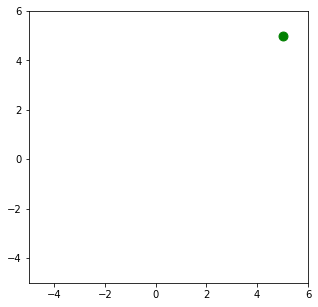

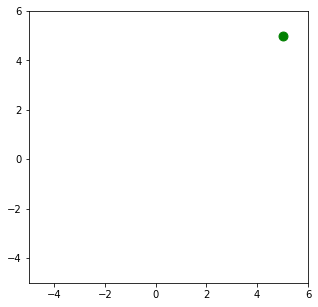

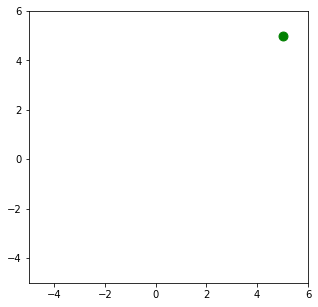

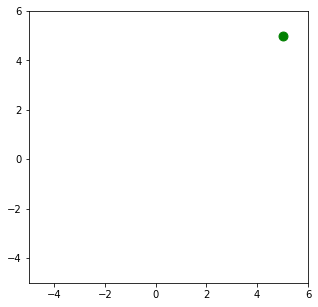

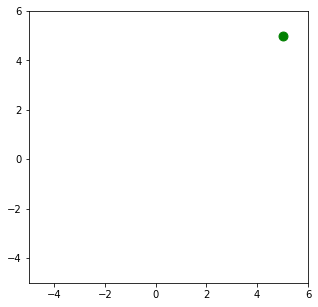

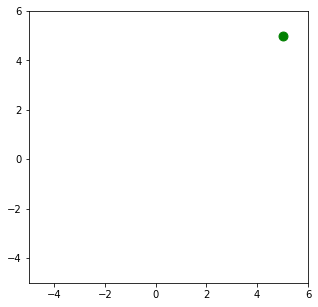

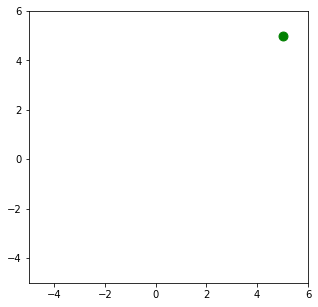

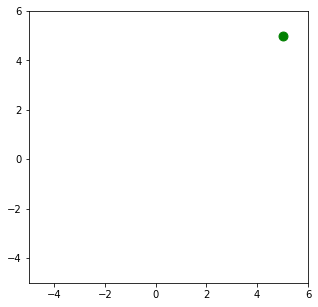

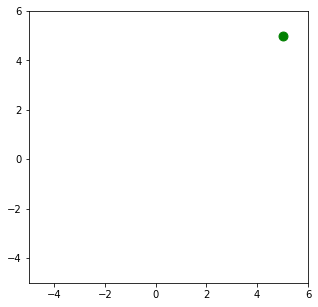

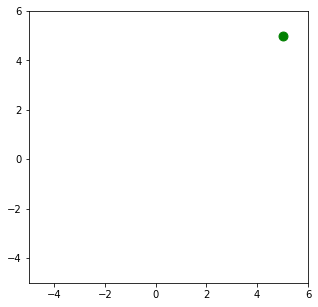

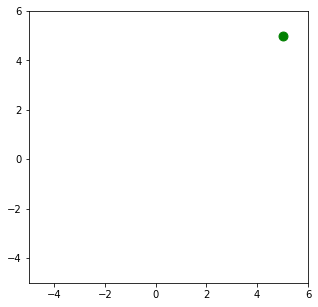

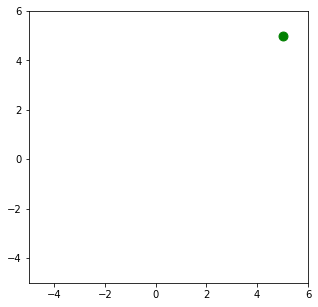

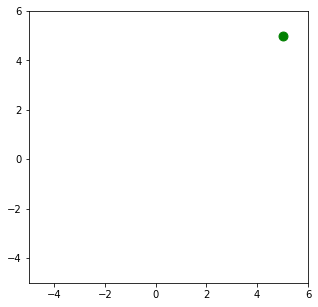

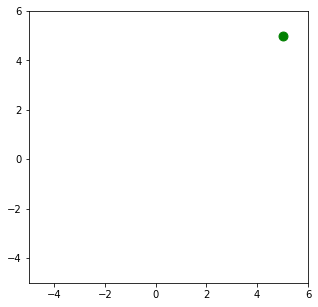

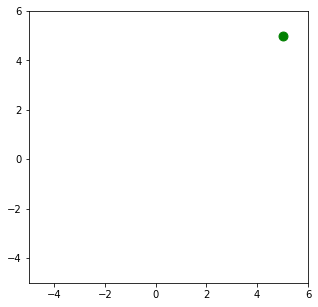

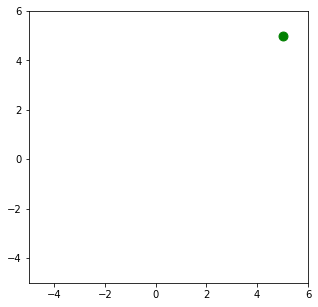

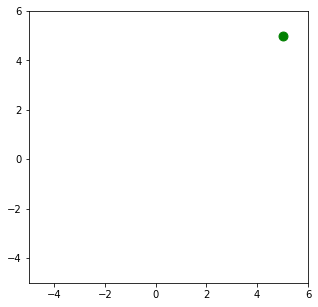

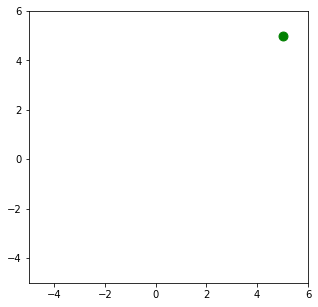

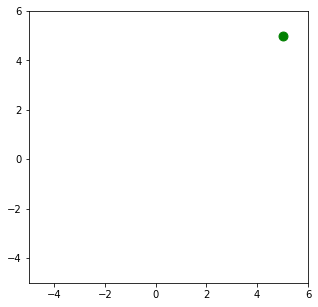

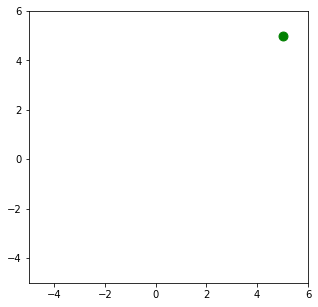

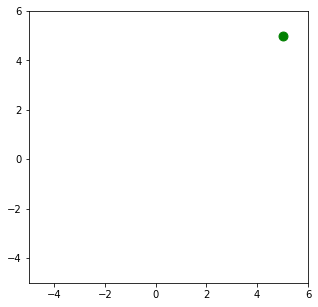

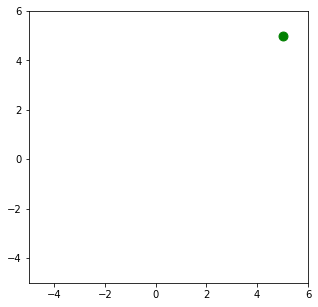

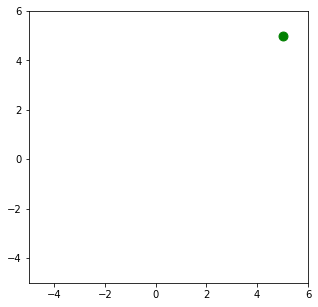

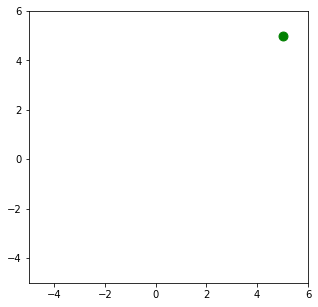

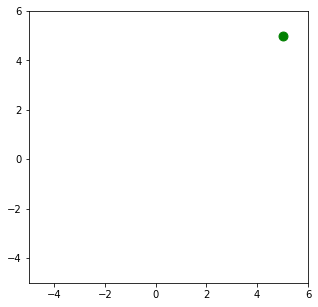

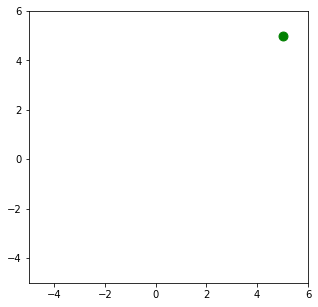

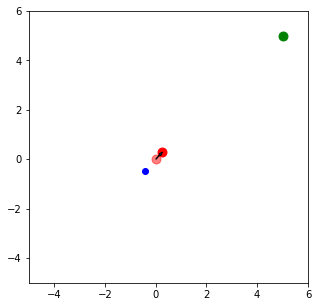

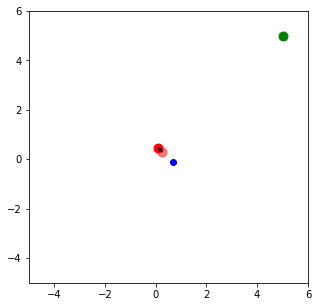

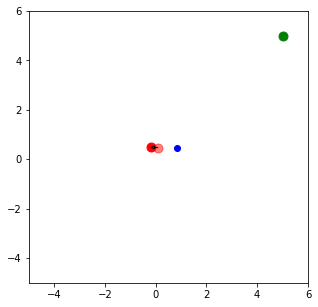

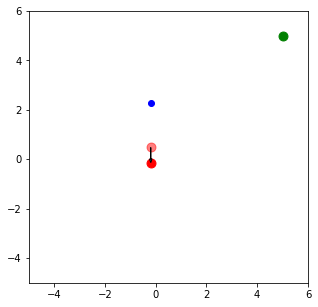

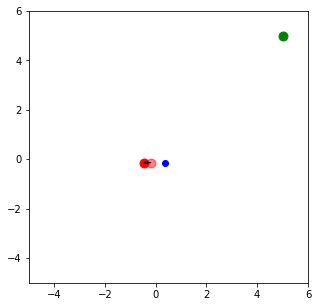

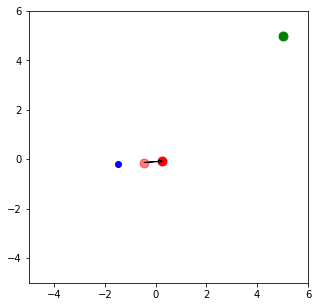

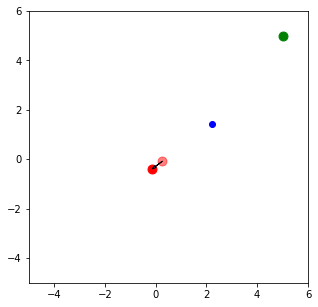

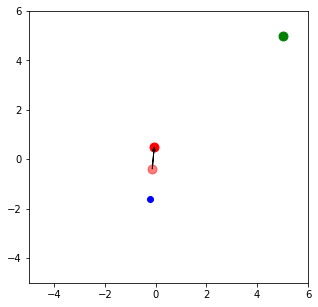

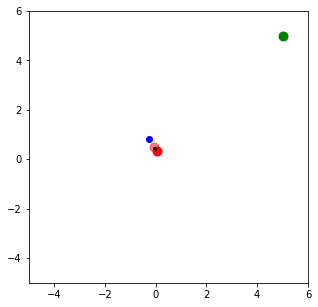

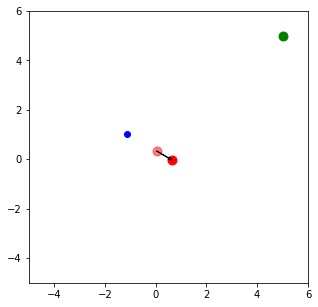

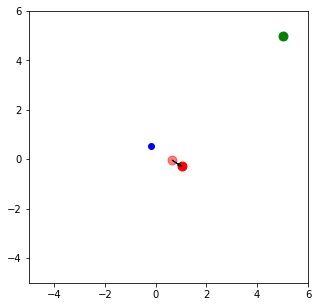

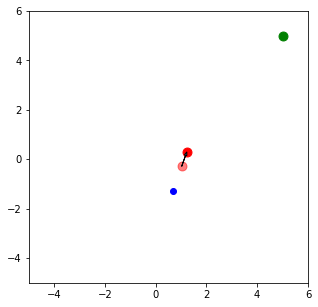

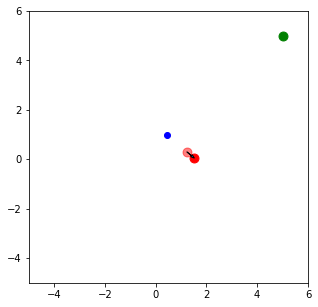

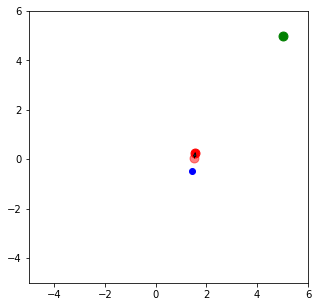

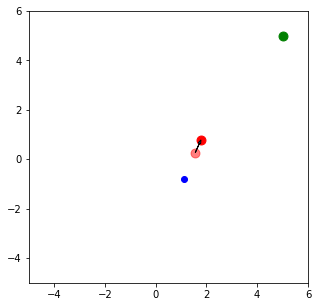

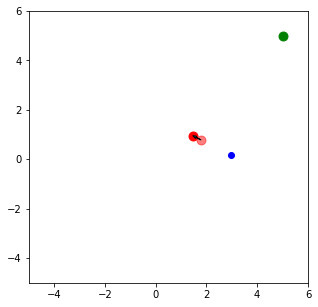

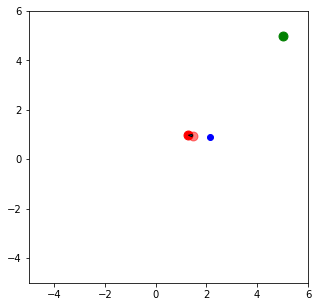

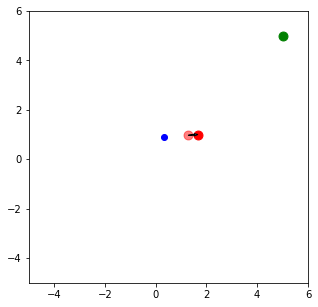

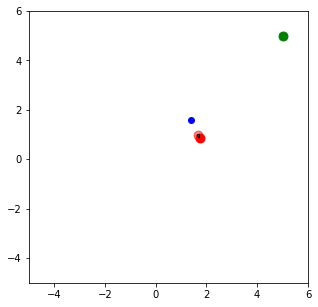

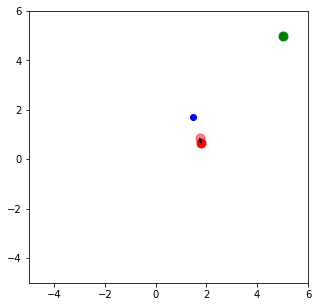

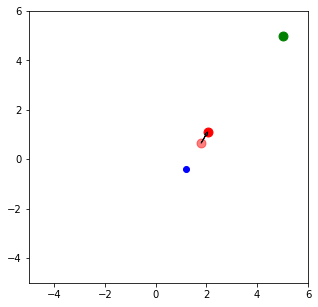

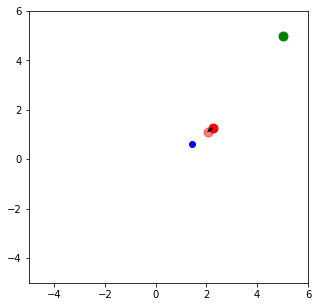

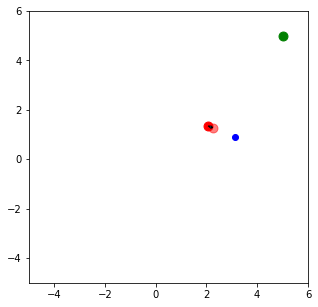

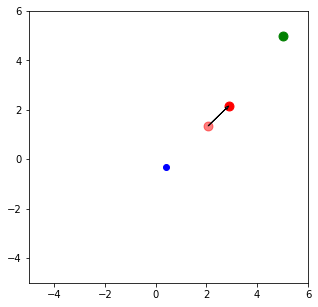

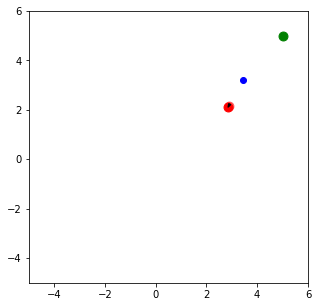

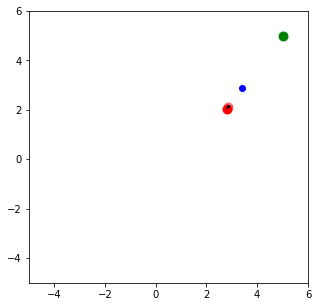

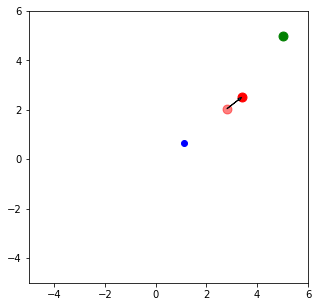

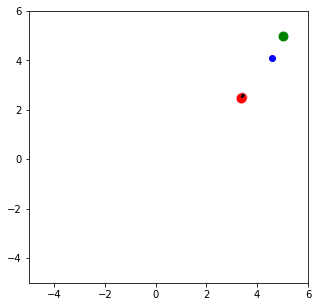

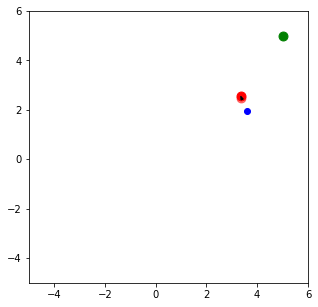

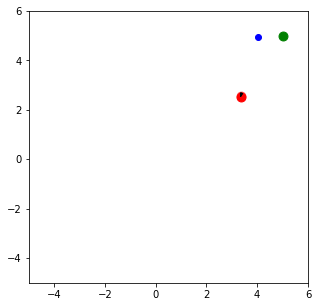

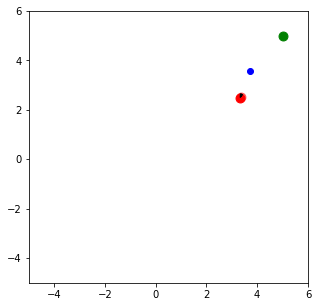

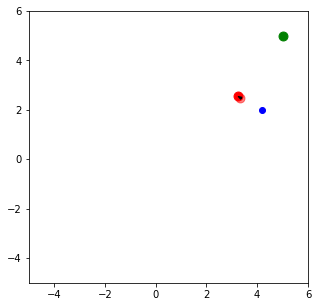

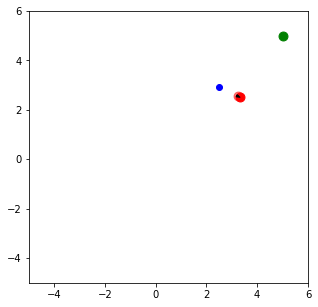

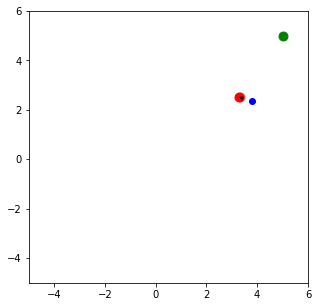

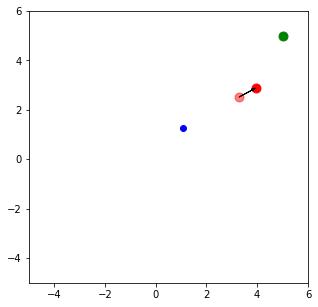

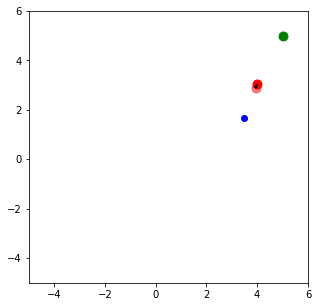

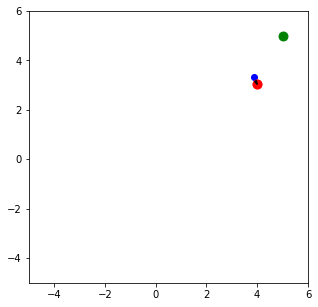

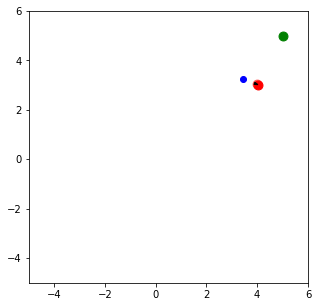

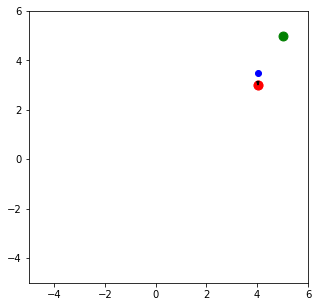

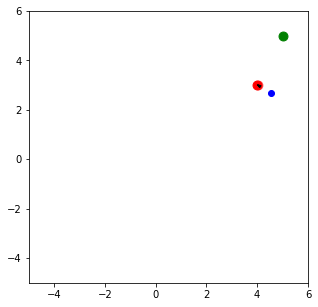

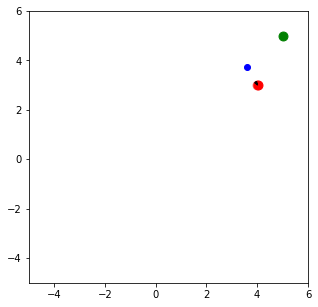

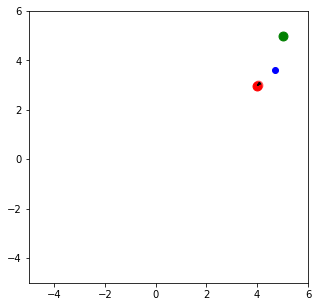

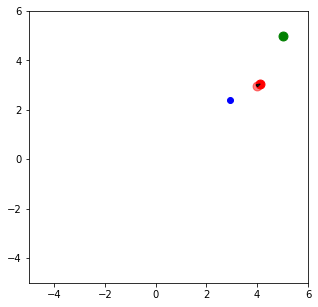

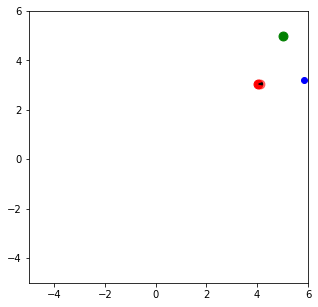

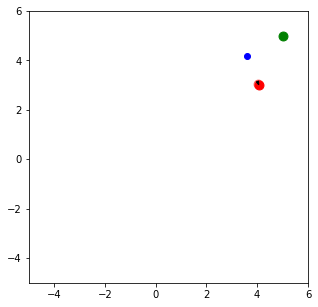

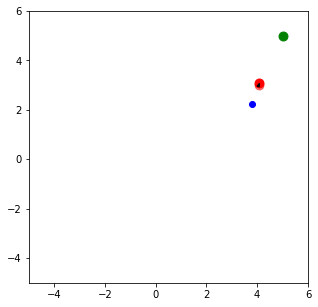

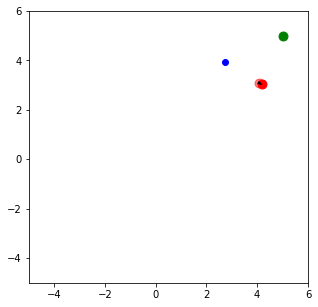

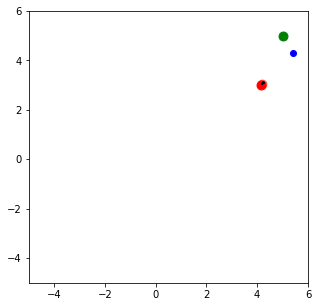

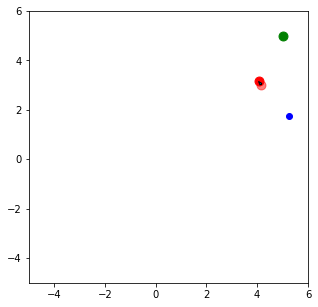

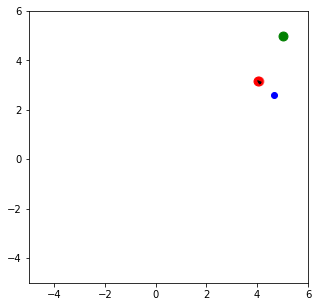

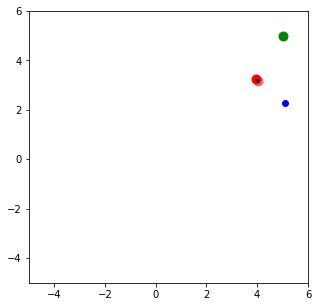

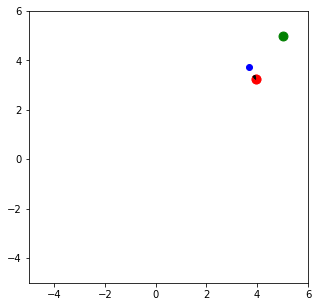

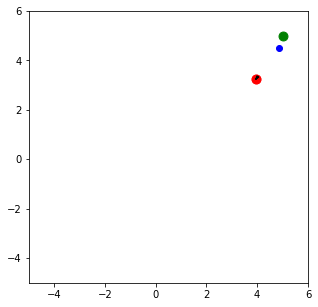

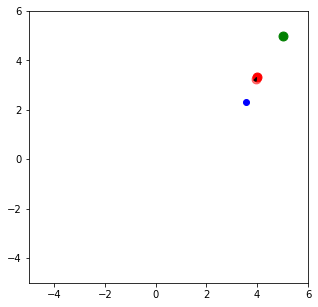

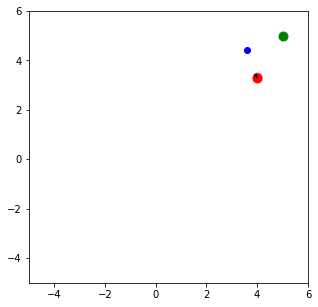

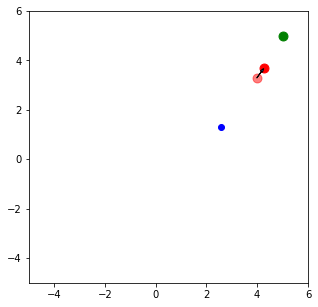

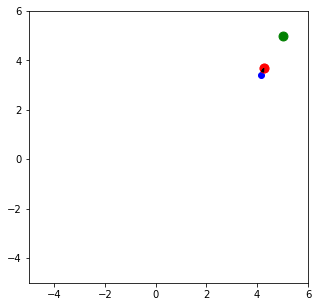

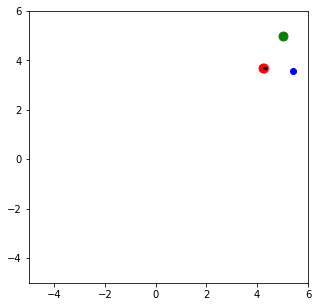

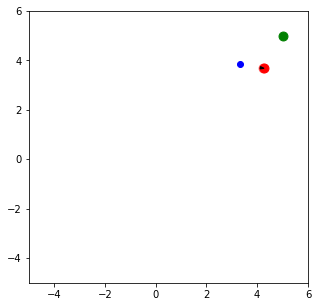

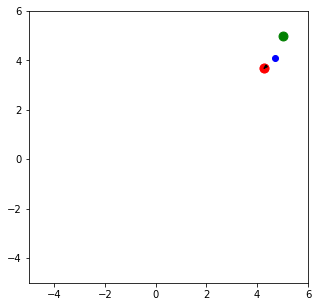

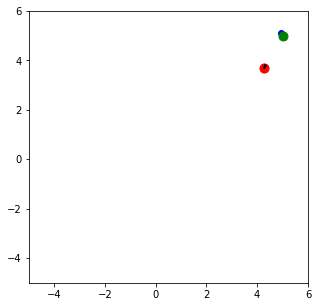

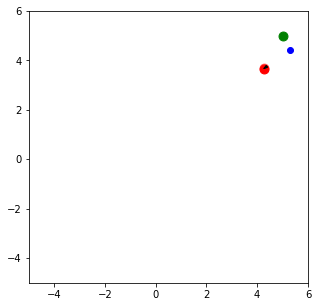

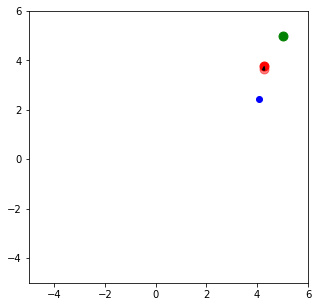

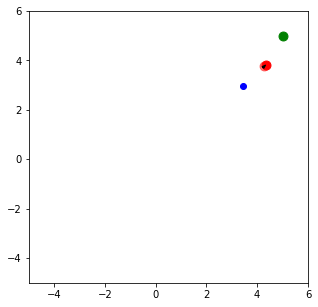

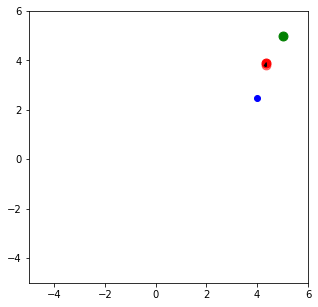

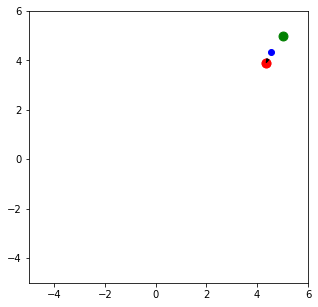

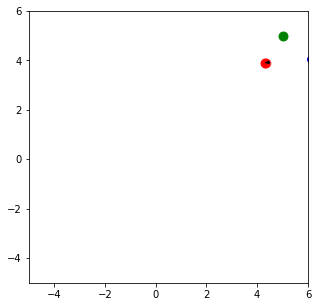

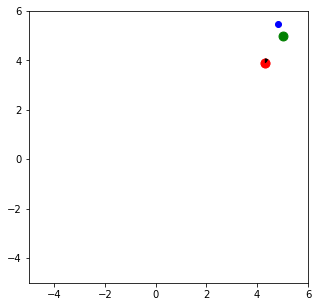

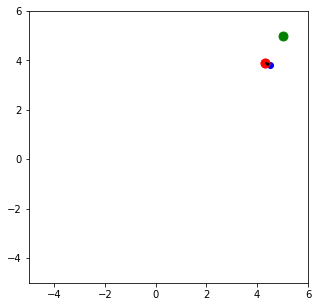

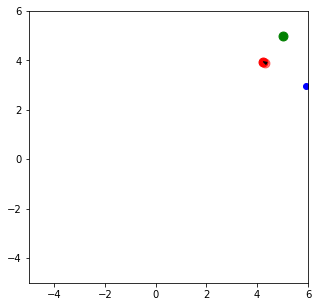

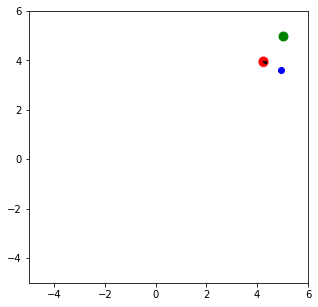

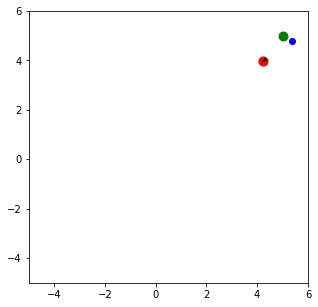

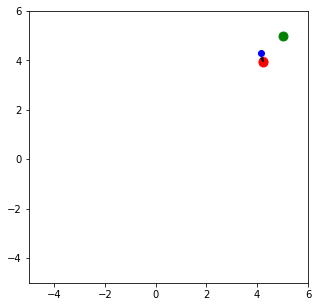

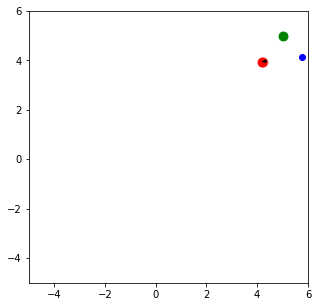

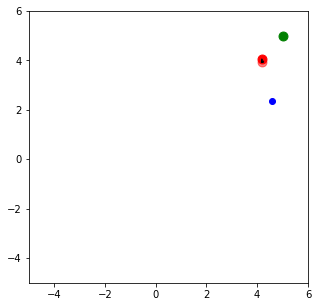

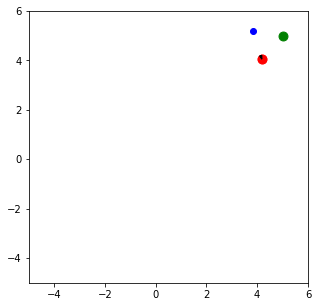

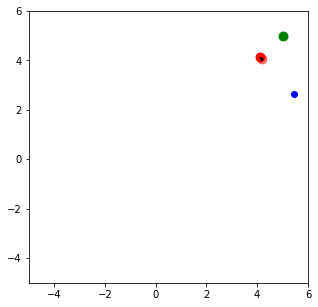

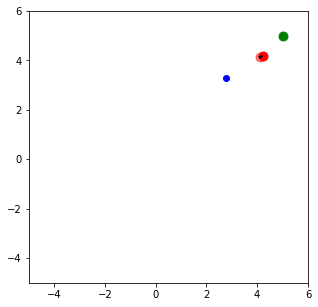

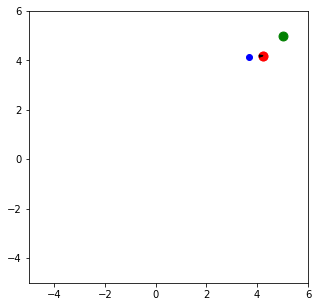

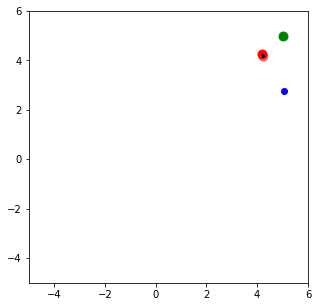

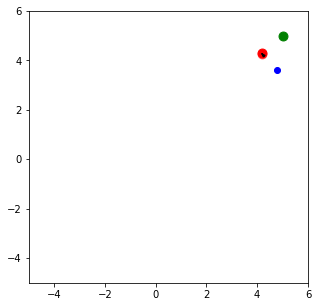

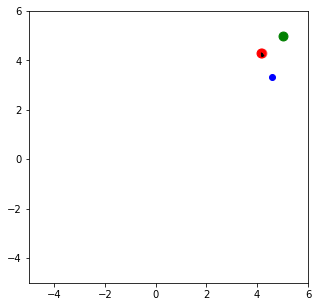

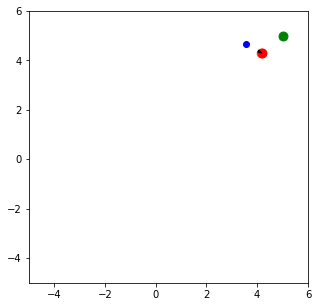

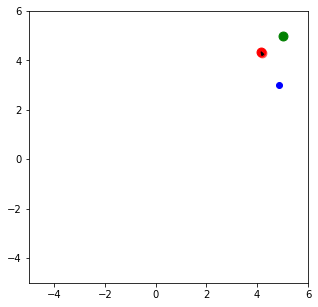

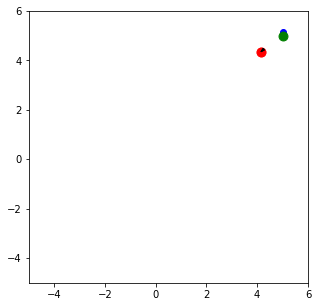

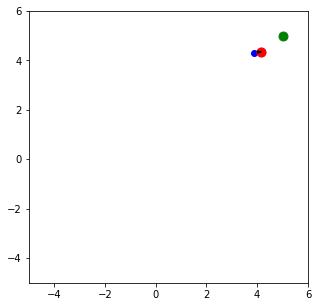

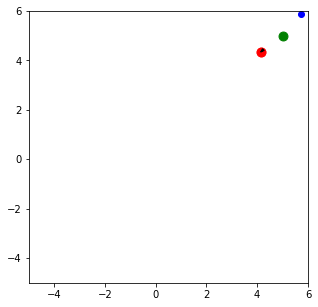

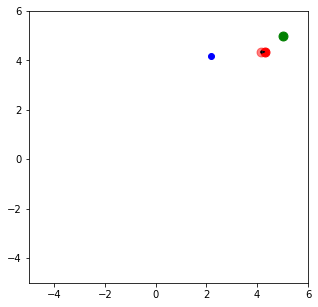

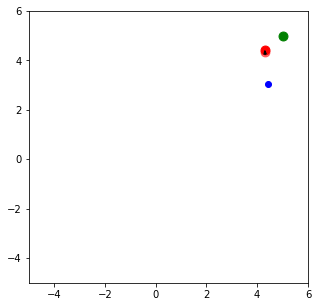

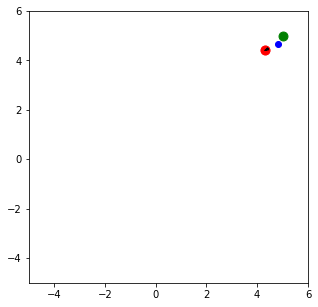

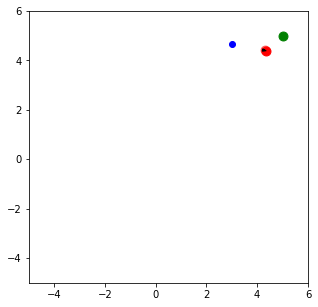

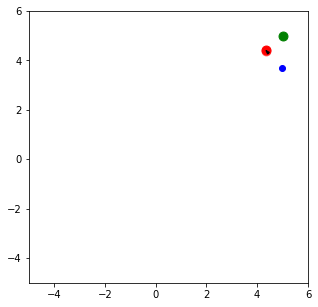

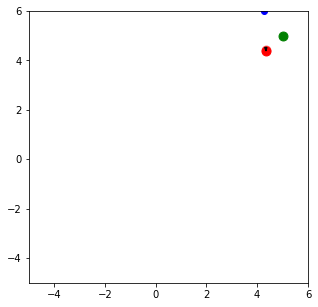

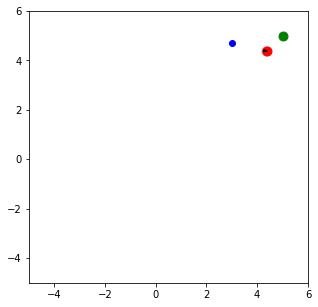

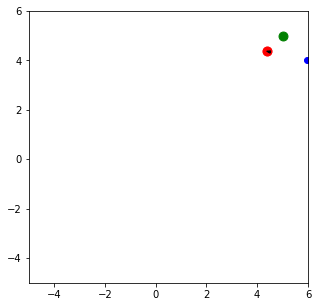

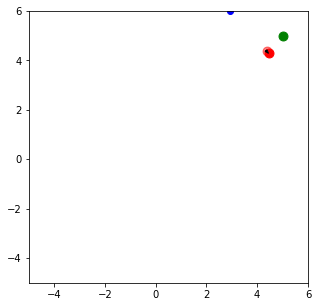

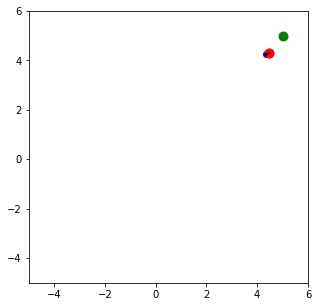

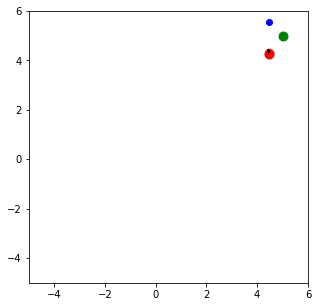

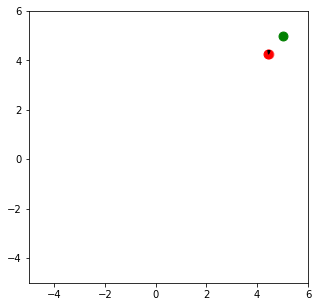

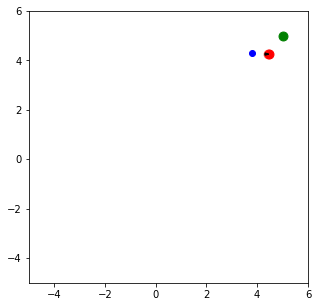

In [4]:
## unstable learning rate
print('Unstable------------')
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100, viz=True)
print()

## stable learning rate
print('Stable-----------')
train(mu, target, loss, lr=0.01, n_train=1, n_test=100, n_iter=100, viz=True)

Increasing `n_train` improve the stability of the training. Now `lr = 0.1` and greater still works well.
We can learn much faster due to larger learning rate.

This is because the gradient signal given by `1` training datapoint is too noisy/wrong.
If we sample a datapoint closer to `target` then we end up pushing `mu` away from `target`.

Increasing `n_train` lowers the variance of the gradient, making the training more stable.
However, this solution quickly become intractable for high dimensional distributions.
The number of samples needed to reliably estimate $\mathbb{E}_{q_\phi (x)}[f(x)]$ grows
exponentially with the number of dimensions of $q_\phi$.

0 36.25750075785146
1 29.9266126688303
2 19.92491782967958
3 15.150167577634539
4 9.643676096832003
5 7.492933095825749
6 5.4706566467606805
7 3.7467552512585223
8 3.702087584945239
9 3.017497787120044
10 2.950822100581887
11 2.3025489603165266
12 2.278750842015803
13 2.1797826299487495
14 2.210836943642032
15 1.9741495266465554
16 2.4467582233611416
17 1.8085943919585592
18 2.1966793396970776
19 1.7445055217480954
20 2.0543327100087097
21 1.5361504797512588
22 2.1349266798909983
23 1.963071056564948
24 2.0150894932678884
25 2.0377510828880356
26 1.8452729163835133
27 1.9377172186259584
28 1.9595225770441125
29 2.0005728023161917
30 1.9277234208854268
31 2.0415965229292685
32 2.1587610322197164
33 1.7626887958765665
34 2.1268567140624213
35 1.971180042747977
36 2.137243184716135
37 2.113926867209878
38 2.088674947376094
39 1.7793889061455974
40 1.4877965273325153
41 1.8694198977930103
42 2.017574865921801
43 2.2651573345623888
44 1.8214353896104662
45 2.031446880933578
46 1.82885549013

<ipython-input-3-03df4d4c30f5>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


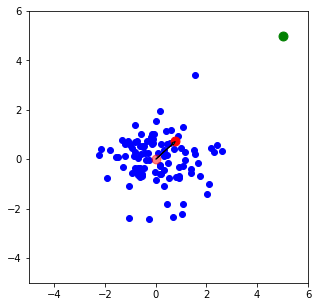

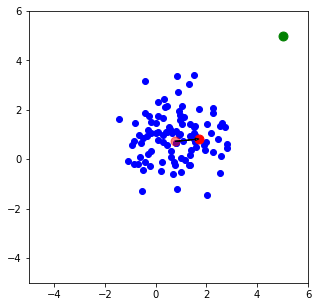

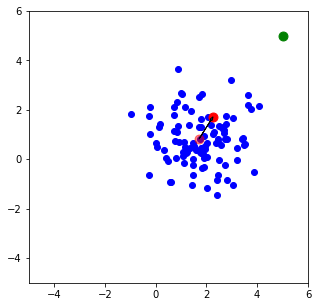

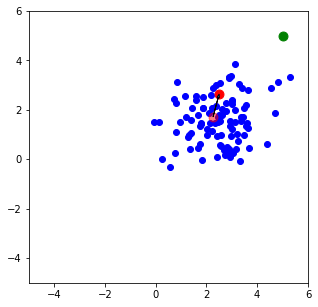

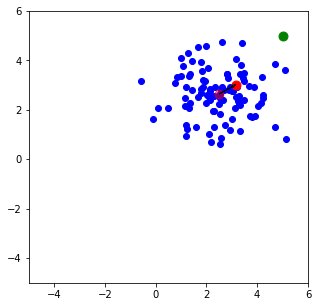

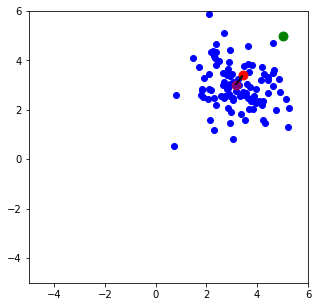

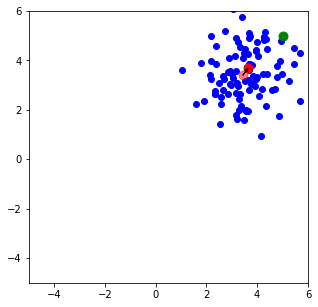

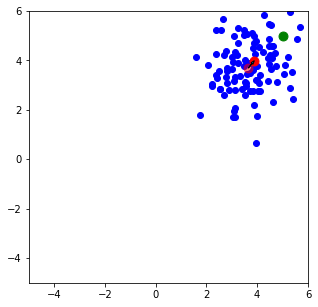

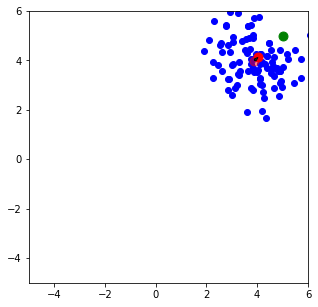

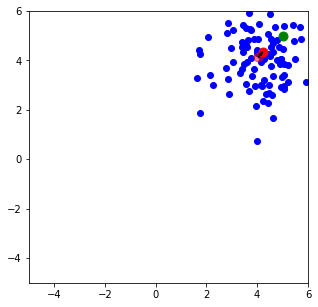

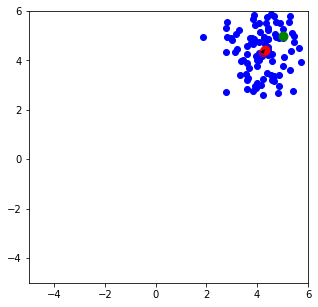

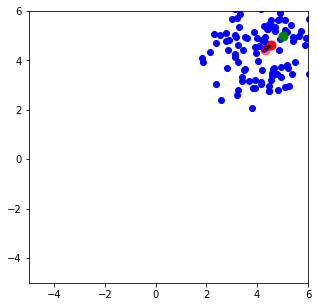

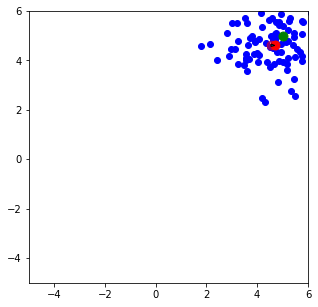

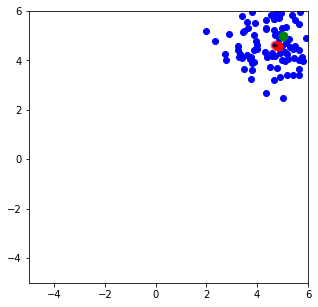

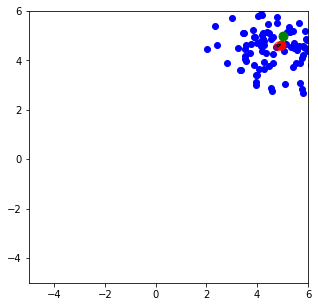

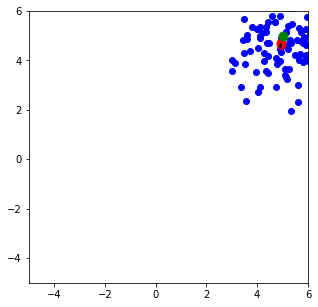

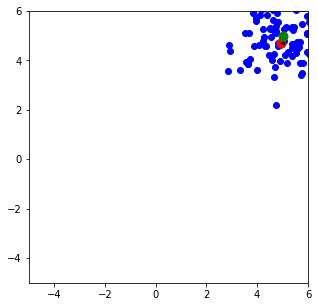

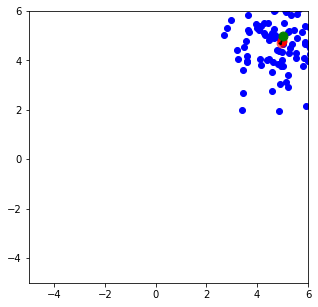

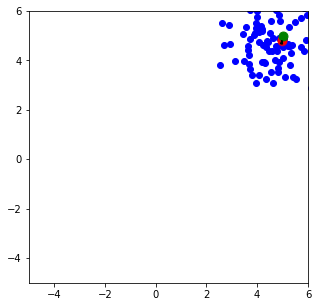

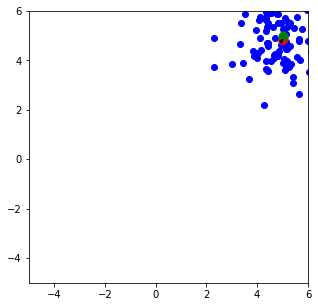

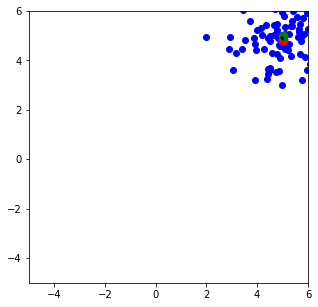

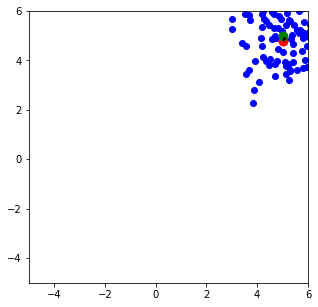

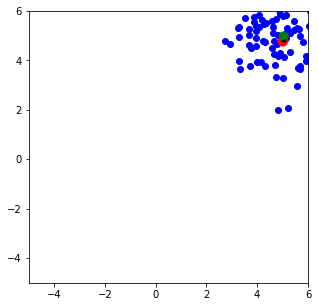

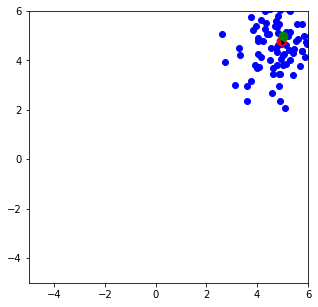

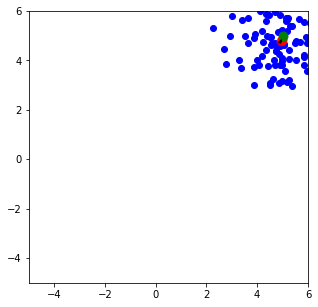

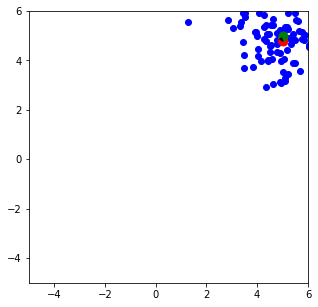

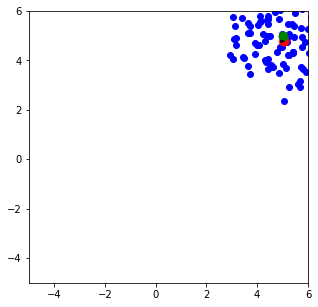

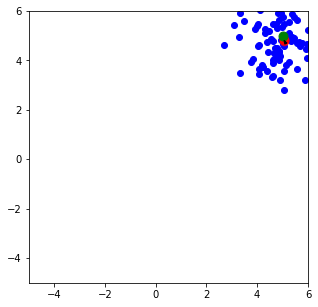

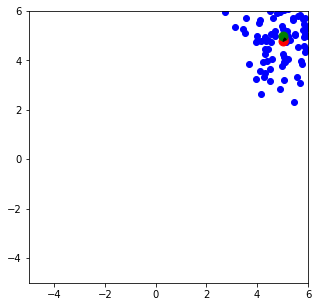

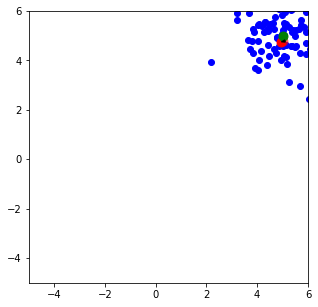

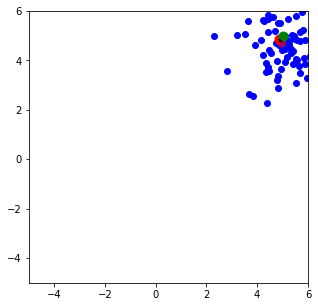

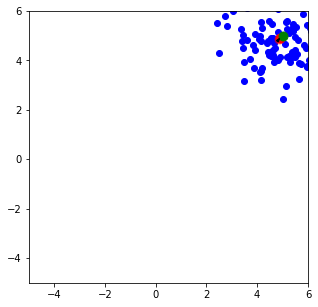

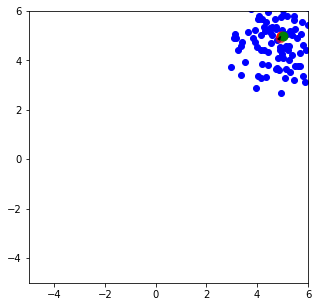

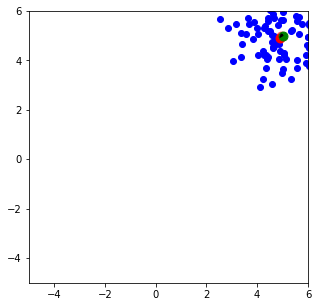

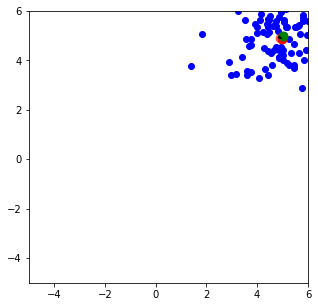

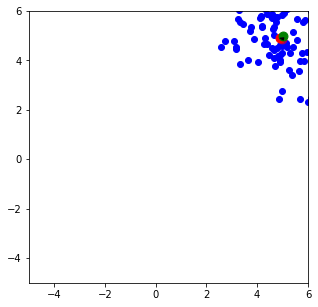

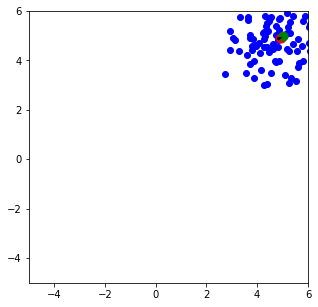

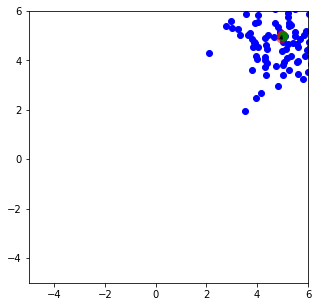

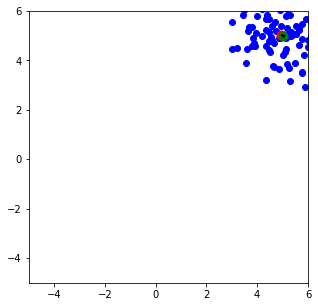

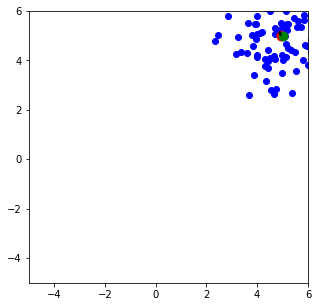

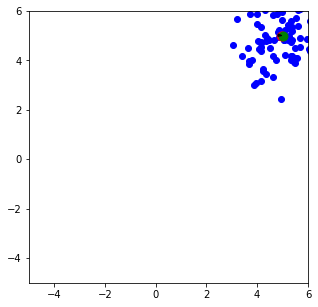

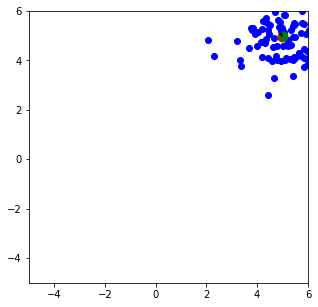

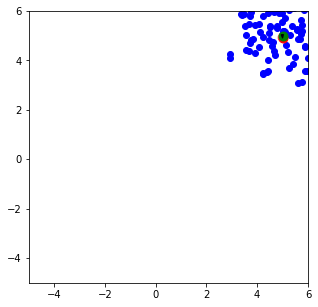

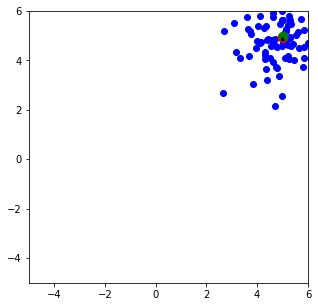

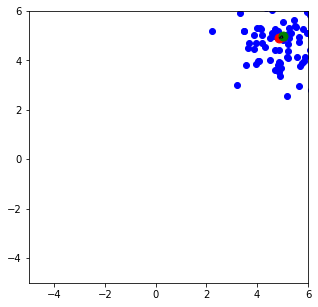

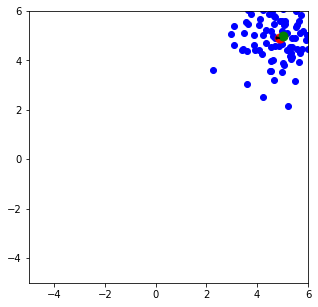

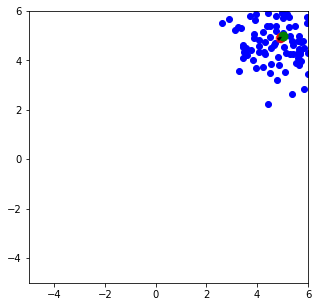

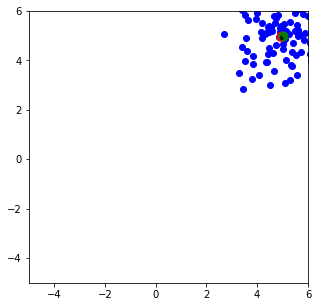

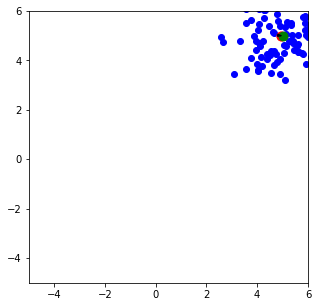

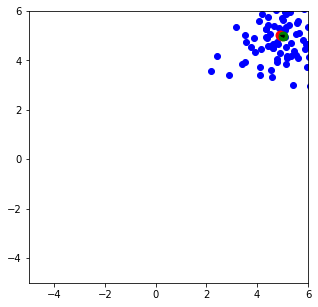

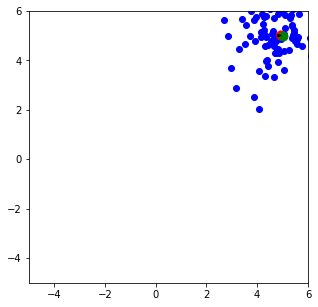

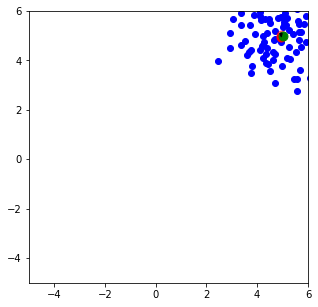

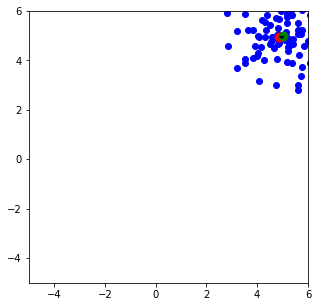

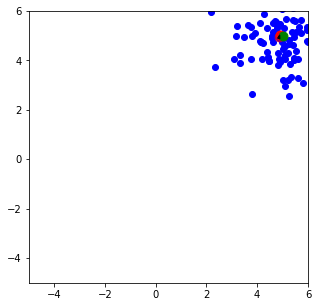

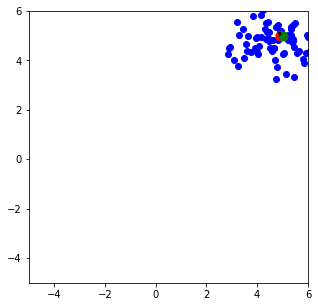

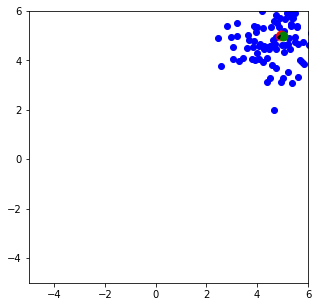

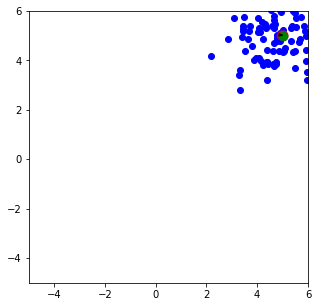

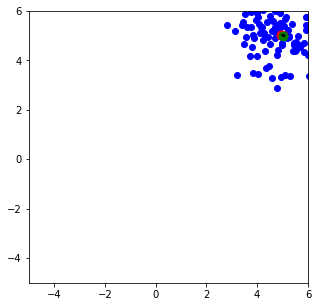

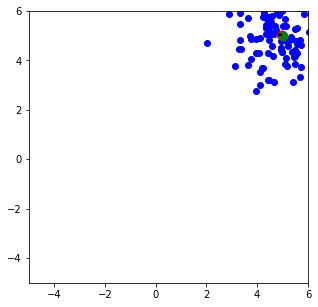

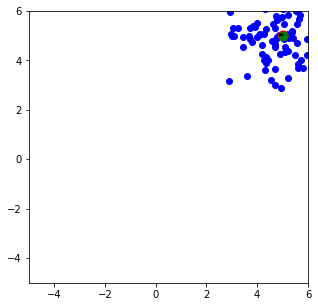

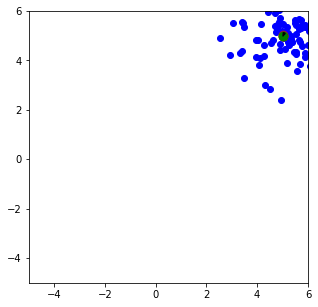

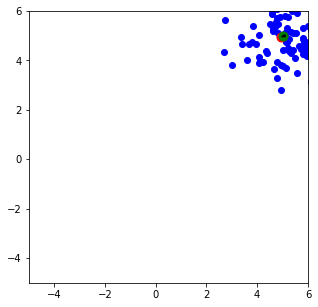

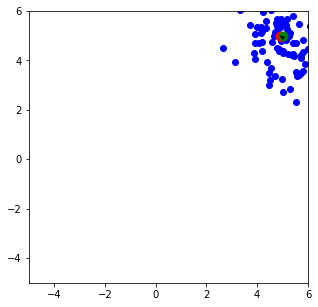

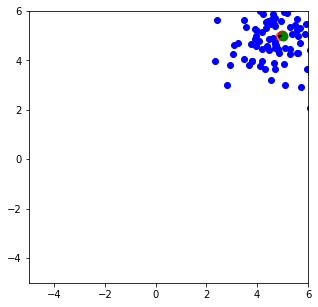

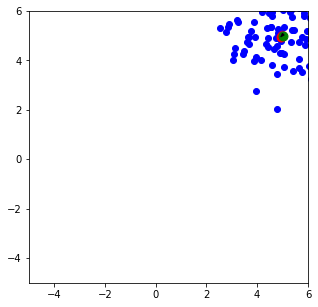

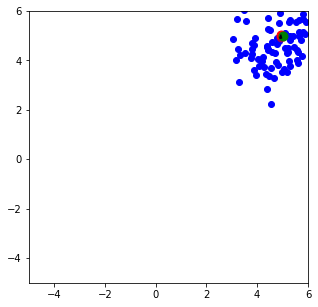

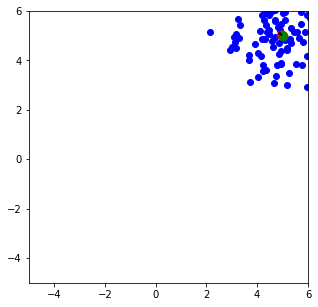

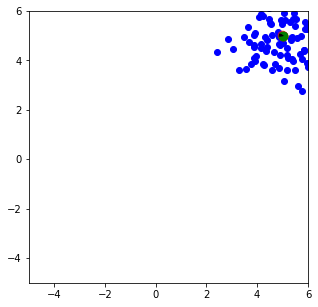

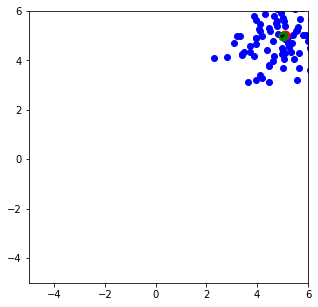

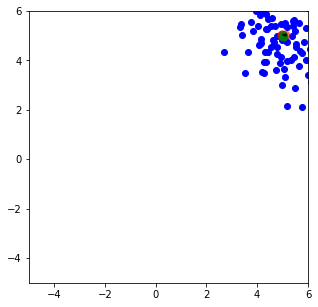

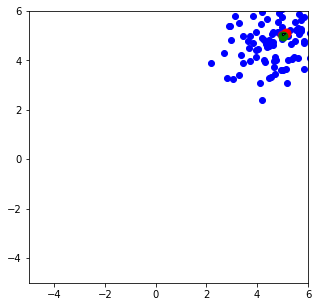

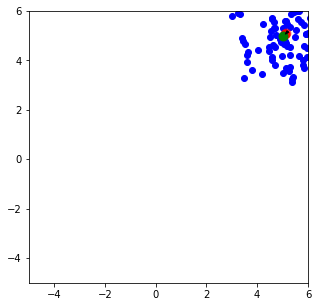

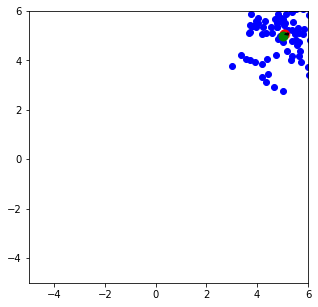

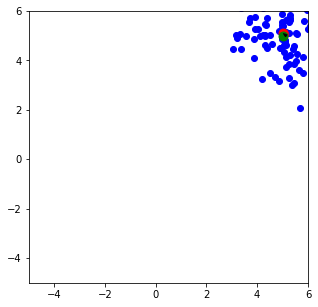

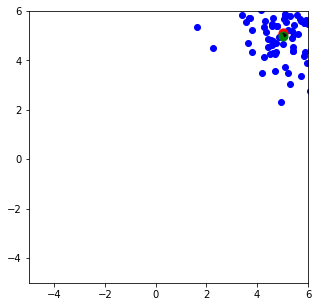

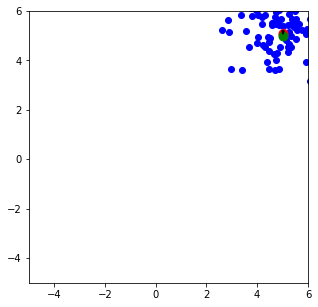

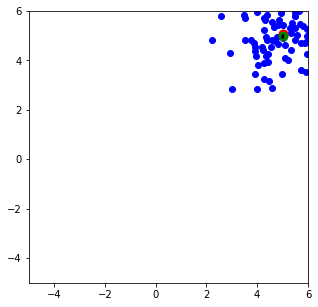

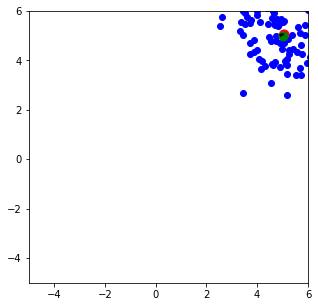

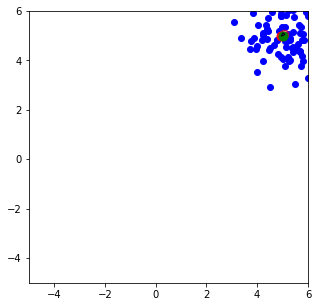

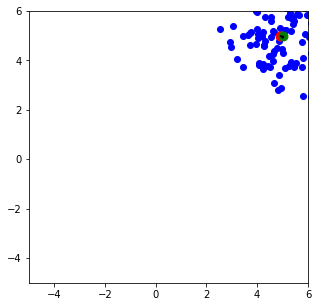

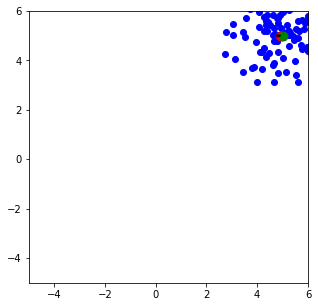

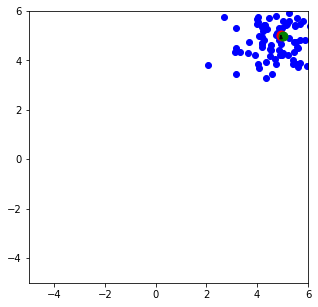

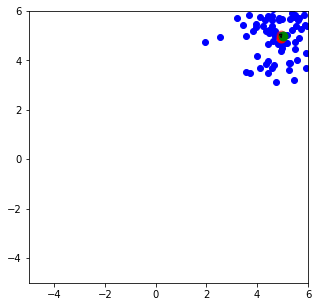

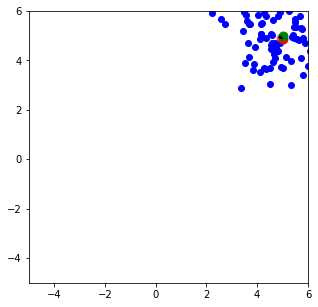

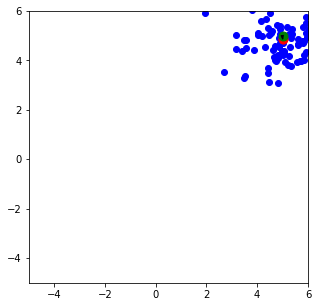

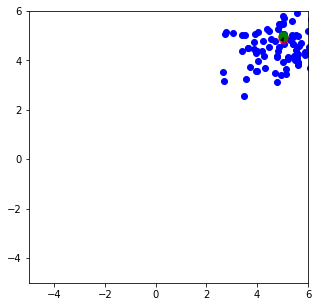

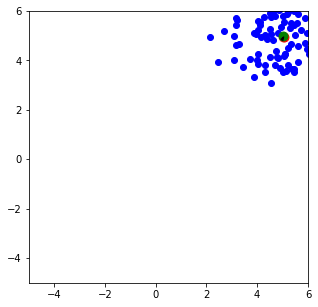

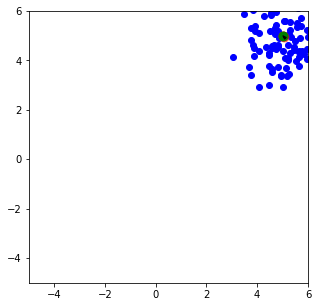

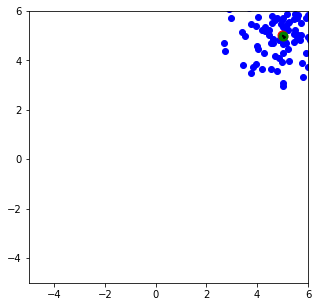

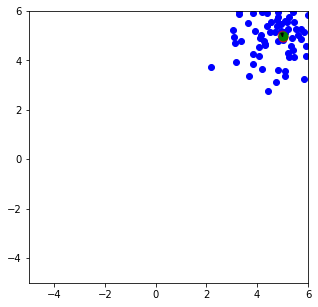

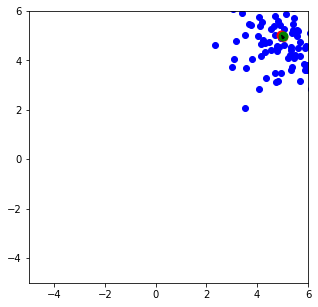

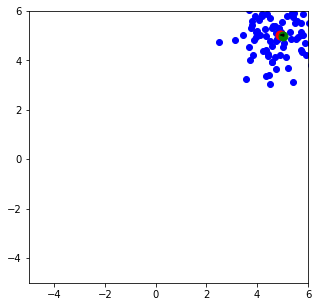

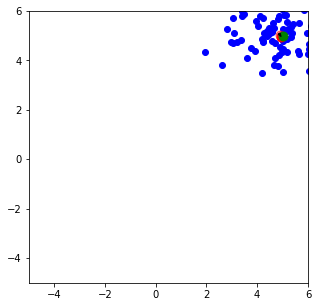

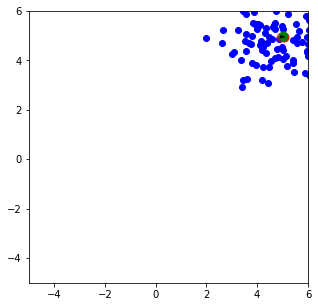

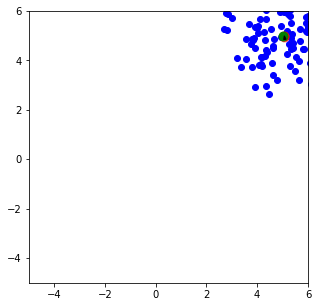

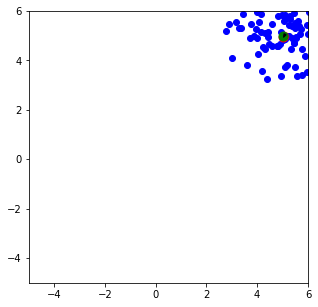

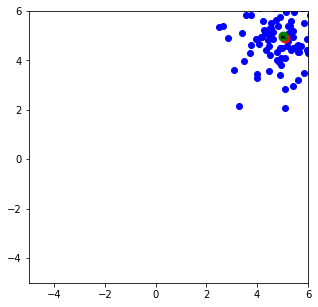

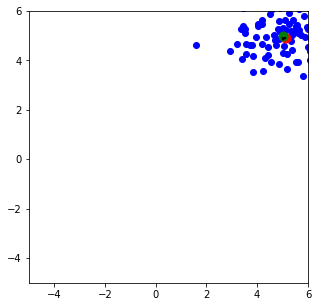

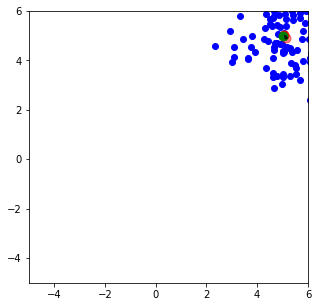

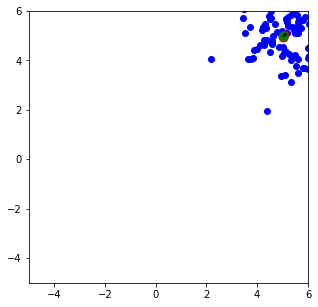

In [5]:
# train(mu, target, loss, lr=0.01, n_train=10, n_test=100, n_iter=100)

train(mu, target, loss, lr=0.1, n_train=100, n_test=100, n_iter=100, viz=True)